### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
dataset=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Age

In [5]:
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)


In [6]:
dataset['Age'][dataset['Age']>55]=53
dataset['Age'][dataset['Age']<3]=3

 # sex

In [7]:
from sklearn.preprocessing import OneHotEncoder


In [8]:
dataset['Sex'][dataset['Sex']=='male']=0
dataset['Sex'][dataset['Sex']=='female']=1

# Pclass

In [9]:
dataset['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
dataset['Pclass'][dataset['Pclass']==3]=0
dataset['Pclass'][dataset['Pclass']==2]=1
dataset['Pclass'][dataset['Pclass']==1]=2


# Fare

In [14]:
dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].mode())

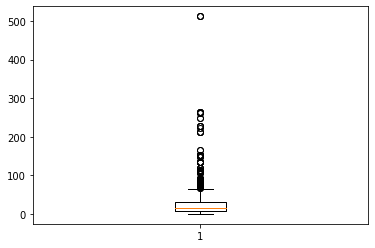

In [15]:
plt.boxplot(dataset['Fare'])
plt.show()

In [16]:
dataset['Embarked'][dataset['Embarked']=='S']=0
dataset['Embarked'][dataset['Embarked']=='C']=1
dataset['Embarked'][dataset['Embarked']=='Q']=2


#  SURVIVED

In [17]:

y=dataset['Survived']
dataset.drop(['Survived'],axis=1,inplace=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [19]:

dataset.drop(['Name','PassengerId','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X = std.fit_transform(dataset)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = pd.DataFrame(X, columns = dataset.columns)
y=y.astype('int')


In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((712, 6), (712,), (179, 6), (179,))

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8047752808988764

In [26]:
pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,classification_report

In [27]:
accuracy_score(y_test,pred)


0.8044692737430168

In [33]:
confusion_matrix(y_test,pred)

array([[93, 12],
       [23, 51]], dtype=int64)

In [28]:
y_train[:5]

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int32

In [29]:
f1_score(y_test,pred)

0.7445255474452555

In [30]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       105\n           1       0.81      0.69      0.74        74\n\n    accuracy                           0.80       179\n   macro avg       0.81      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

In [31]:
dataset.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [32]:
dataset.shape

(891, 6)